In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
np.random.seed(101)
tf.set_random_seed(101)

In [3]:
n_features = 10
n_neurons = 3

In [4]:
x = tf.placeholder(tf.float32, shape=(None, n_features))
w = tf.Variable(tf.random_normal([n_features, n_neurons]))
b = tf.Variable(tf.zeros([n_neurons]))

In [5]:
xw = tf.matmul(x, w)
z = tf.add(xw, b)
a = tf.sigmoid(z)

In [12]:
init = tf.global_variables_initializer()

In [14]:
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a, feed_dict={x:np.random.random([1, n_features])})

In [15]:
print(layer_out)

[[ 0.61933172  0.71785265  0.23824851]]


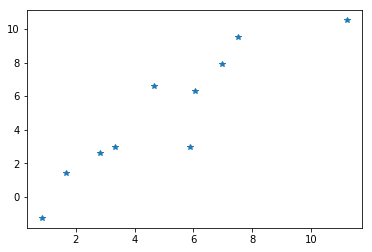

In [20]:
x_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)
y_label = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)
plt.plot(x_data, y_label,'*')

In [21]:
m = tf.Variable(0.40)
b = tf.Variable(0.55)

# Error Function
error = 0
for x, y in zip(x_data, y_label):
    y_hat = m*x + b
    error += (y-y_hat)**2

# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [22]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    epochs = 100
    for i in range(epochs):
        sess.run(train)
    final_slope, final_intercept = sess.run([m, b])

In [24]:
print(final_slope, final_intercept)

0.99622 0.0916975


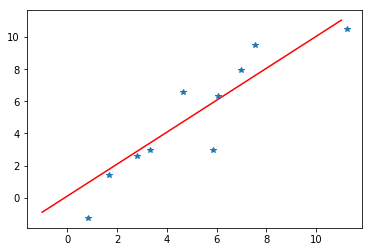

In [25]:
x_test = np.linspace(-1, 11, 10)
y_pred = final_slope * x_test + final_intercept
plt.plot(x_test,y_pred,'r')
plt.plot(x_data,y_label,'*')